In [1]:
"""
磁异常倾斜角度
--------------------------------

通常是对化极后的磁异常进行边界检测
"""

import matplotlib.pyplot as plt
from geoist.pfm import prism, pftrans, giutils
from geoist.inversion.geometry import Prism
from geoist import gridder


In [2]:
# 模型设置（化极后结果）
inc, dec = 90, 0
mag = giutils.ang2vec(1, inc, dec)
model = [Prism(-1500, 1500, -500, 500, 0, 2000, {'magnetization': mag})]
area = (-7e3, 7e3, -7e3, 7e3)
shape = (100, 100)
#模型剖分
x, y, z = gridder.regular(area, shape, z=-300)
data_at_pole = prism.tf(x, y, z, model, inc, dec)

In [3]:
# 计算倾斜角
tilt = pftrans.tilt(x, y, data_at_pole, shape)

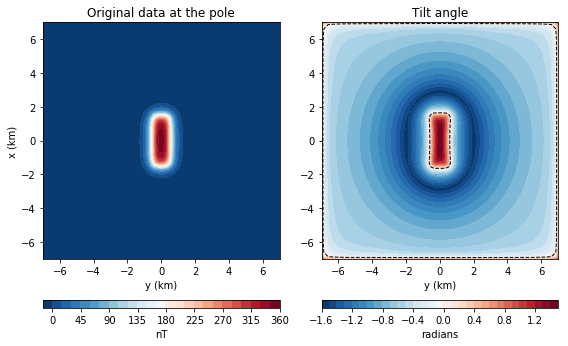

In [4]:
#画图
plt.figure(figsize=(8, 6))

ax = plt.subplot(1, 2, 1)
ax.set_title('Original data at the pole')
ax.set_aspect('equal')
tmp = ax.tricontourf(y/1000, x/1000, data_at_pole, 30, cmap='RdBu_r')
plt.colorbar(tmp, pad=0.1, aspect=30, orientation='horizontal').set_label('nT')
ax.set_xlabel('y (km)')
ax.set_ylabel('x (km)')
ax.set_xlim(area[2]/1000, area[3]/1000)
ax.set_ylim(area[0]/1000, area[1]/1000)

ax = plt.subplot(1, 2, 2)
ax.set_title('Tilt angle')
ax.set_aspect('equal')
tmp = ax.tricontourf(y/1000, x/1000, tilt, 30, cmap='RdBu_r')
plt.colorbar(tmp, pad=0.1, aspect=30,
             orientation='horizontal').set_label('radians')
# Plot the tilt zero contour
ax.tricontour(y/1000, x/1000, tilt, levels=[0], colors='k', linestyles='--',
              linewidths=1)
ax.set_xlabel('y (km)')
ax.set_xlim(area[2]/1000, area[3]/1000)
ax.set_ylim(area[0]/1000, area[1]/1000)

plt.tight_layout()
plt.show()